# Machine Learning 

## KNN As Regressor

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Loading Titanic Dataset using Seaborn
df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Let's get the info of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Let's check for missing values in our dataset
print(df.isnull().sum().sort_values(ascending=False))

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64


In [5]:
# Let's check the percentage of missing values in our dataset.
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64


In [6]:
# Let's drop the missing values of deck column
df = df.drop("deck",axis=1)

In [7]:
# Let's check the name of columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [8]:
# Let's again check for missing values
print(df.isnull().sum().sort_values(ascending=False))

age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
parch            0
sibsp            0
class            0
fare             0
who              0
adult_male       0
alive            0
alone            0
dtype: int64


In [9]:
# Let's Fill the missing values of age , embarked and embark_town column
# Fill missing values in 'age' with the mean age
df['age'] = df['age'].fillna(df['age'].mean())

# Fill missing values in 'embarked' and 'embark_town' with the mode (most frequent value)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [10]:
# Let's again check for missing values
print(df.isnull().sum().sort_values(ascending=False))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [12]:
# Let's remove outliers

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Let's remove outliers of fare 

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]


In [13]:
# Let's Split the dataset
X = df_no_outliers.drop("fare", axis=1)
y =  df_no_outliers["fare"]

In [14]:
# Let's encode category and object column using LabelEncoder in For Loop.
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [15]:
# Let's scale the data using MinMax

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Reshape y to 2D

In [16]:
# Let's train and evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size=0.2, 
                                                    random_state=42)

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# fit the model on the training data
model.fit(X_train, y_train)

# predict the species for the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

# Create a DataFrame to show them side by side
results = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicted': y_pred.ravel()
})

print(results.head(10))

Mean Squared Error: 0.5917717246688051
R2 Score: 0.5689071072239906
RMSE: 0.7692670047966474
     Actual  Predicted
0  2.334834   1.087532
1 -0.675022  -0.836109
2 -0.153316  -0.138580
3 -0.731524  -0.689393
4 -0.731524  -0.758973
5 -0.734590  -0.732198
6  0.991421   1.354188
7 -0.171128  -0.025948
8  0.602676   0.602676
9  2.882024   1.441455


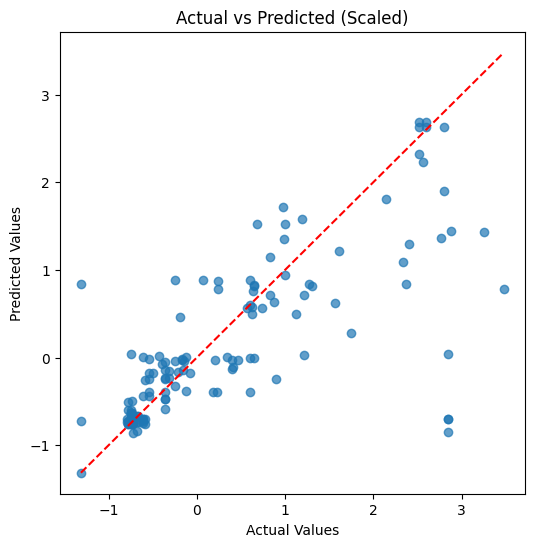

In [17]:


# Assuming y_test and y_pred are already scaled and available
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Scaled)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

# KNN Act as Classifier

In [68]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [83]:
# Load Dataset
dff = sns.load_dataset("penguins")
print(dff.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [84]:
# check for missing values
print(dff.isnull().sum().sort_values(ascending=False))

sex                  11
bill_depth_mm         2
bill_length_mm        2
flipper_length_mm     2
body_mass_g           2
island                0
species               0
dtype: int64


In [85]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [86]:
dff.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [87]:
# Filling Missing Values
dff["sex"] = dff["sex"].fillna(dff["sex"].mode()[0])
dff["bill_length_mm"] = dff["bill_length_mm"].fillna(dff["bill_length_mm"].mean())
dff["bill_depth_mm"] = dff["bill_depth_mm"].fillna(dff["bill_depth_mm"].mean())
dff["flipper_length_mm"] = dff["flipper_length_mm"].fillna(dff["flipper_length_mm"].mean())
dff["body_mass_g"] = dff["body_mass_g"].fillna(dff["body_mass_g"].mean())

In [88]:
# Again # check for missing values
print(dff.isnull().sum().sort_values(ascending=False))

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [89]:
print(dff["island"].value_counts())

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


In [90]:
# Let's remove outliers.
def remove_outliers_iqr(dff):
    numeric_cols = dff.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        Q1 = dff[col].quantile(0.25)
        Q3 = dff[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dff = dff[(dff[col] >= lower) & (dff[col] <= upper)]
    return dff

dfff = remove_outliers_iqr(dff)

In [91]:
X = dfff.drop("island",axis=1)
y = dfff["island"]

In [92]:
# Let's encode object column using LabelEncoder in For Loop.
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

In [93]:
# Let's scale the data using MinMax

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
# Encode y if it is categorical 

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_encoded.reshape(-1, 1))



In [97]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, 
                                                    test_size=0.2, 
                                                    random_state=42)

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# y_test: actual labels, y_pred: predicted labels

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print actual vs predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results.head(10))

Accuracy: 0.6376811594202898
Precision: 0.5683584618980833
Recall: 0.6376811594202898
F1 Score: 0.5997814584771106

Confusion Matrix:
 [[23  3  5]
 [ 3 21  1]
 [ 6  7  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        31
           1       0.68      0.84      0.75        25
           2       0.00      0.00      0.00        13

    accuracy                           0.64        69
   macro avg       0.47      0.53      0.49        69
weighted avg       0.57      0.64      0.60        69

   Actual  Predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          1
9       0          0


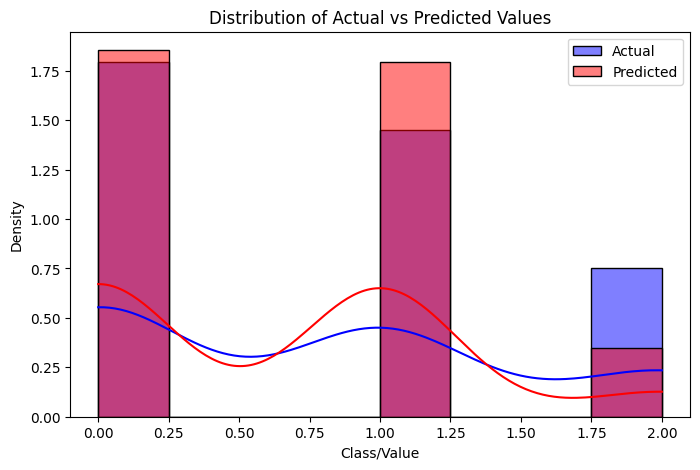

In [99]:
# Assuming results DataFrame has 'Actual' and 'Predicted' columns
plt.figure(figsize=(8, 5))
sns.histplot(results['Actual'], color='blue', label='Actual', kde=True, stat="density", alpha=0.5)
sns.histplot(results['Predicted'], color='red', label='Predicted', kde=True, stat="density", alpha=0.5)
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Class/Value')
plt.ylabel('Density')
plt.show()

## Applying Knn as Classifier on Iris

In [100]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [101]:
# Load the dataset
iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [104]:
# Getting the info of our dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
# Check for missing values in our dataset
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [107]:
# Splitting the data
X = iris.drop("species",axis=1)
y = iris["species"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# y_test: actual labels, y_pred: predicted labels

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print actual vs predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results.head(10))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

         Actual   Predicted
73   versicolor  versicolor
18       setosa      setosa
118   virginica   virginica
78   versicolor  versicolor
76   versicolor  versicolor
31       setosa      setosa
64   versicolor  versicolor
141   virginica   virginica
68   versicolor  versicolor
82   versicolor  versicolor


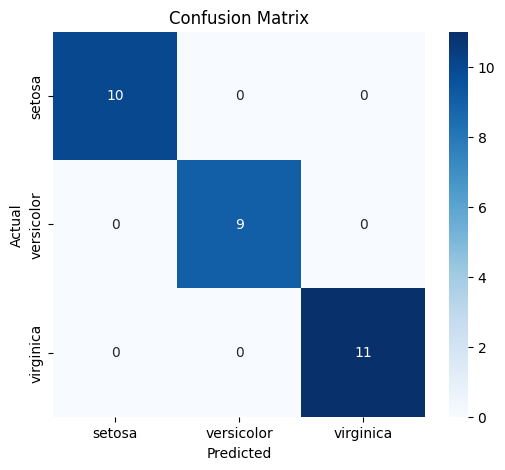

In [115]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()